In [219]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [221]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества
# классификация вина https://www.kaggle.com/brynja/wineuci
data = pd.read_csv("Wine.csv")
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [222]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

#выделяем labels
y = data["1"]
X = data.drop(columns=["1"])

#делим на обучающие и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

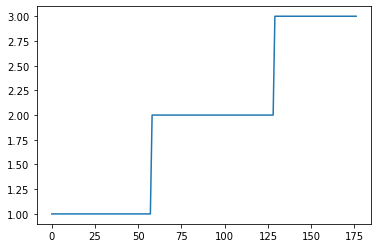

In [223]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов
plt.plot(y)
plt.show()

распределение примеров по классам в норме

<BarContainer object of 13 artists>

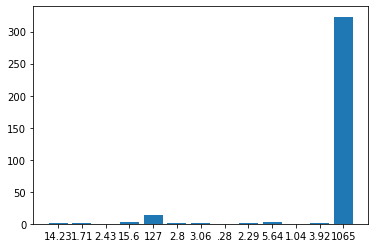

In [224]:
plt.bar(X.columns, X_train.std())

нужно отмаштабировать признаки

<BarContainer object of 13 artists>

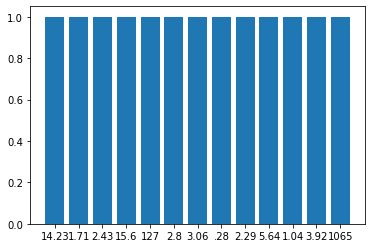

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

plt.bar(X.columns, X_train.std())

In [226]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества
#Классификация не бинарная, распределение по классам достаточно равное. 
#Классы - это культуры(винограда) и они являются равнозначимыми, т. е. ошибки первого и второго рода нас не заботят.
#Значит можно взять самую простую метрику - accuracy

def accuracy(y, true_y):
  return (y==true_y).mean()

In [227]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!
#так как лог. регрессия подходит только для бинарной классификации, для решения нашей 
#задачи мы обучем несколько моделей по принципу "один против всех"

#(KP) добавляем регуляризацию l1
class_number = 3
l = 5
class myLogisticRegression:
  def sigmoid(self, x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

  def loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
  def gradient_descent(self, X, h, y, theta, l):
    thetaReg = theta[1:]
    reg = np.concatenate([np.array([0]), (l / len(X)) * (thetaReg)])
    return (np.dot(X.T, (h - y)) / len(X)) + reg

  def fit(self, X, y, lr=0.1, iterations= 40):

    self.all_theta = np.zeros((class_number, X.shape[1]))

    acc = np.array([accuracy(LR.predict(X_train), y_train)]) #for grafs
    acc_test = np.array([accuracy(LR.predict(X_test), y_test)])

    for _ in range(iterations):
      for i in range(1,class_number+1):
        y_i = np.array([1 if label == i else 0 for label in y])
        sigma = self.sigmoid(X, self.all_theta[i-1,:])    
        dW = self.gradient_descent(X , sigma, y_i, self.all_theta[i-1,:], l)
        self.all_theta[i-1,:] -= lr * dW

      acc = np.append(acc, accuracy(LR.predict(X_train), y_train))
      acc_test = np.append(acc_test, accuracy(LR.predict(X_test), y_test))

    plt.plot(acc)
    plt.plot(acc_test)
    plt.show()

  def predict(self, X):
    h = self.sigmoid(X, self.all_theta.T)
    h_argmax = np.argmax(h, axis=1)
    return h_argmax+1

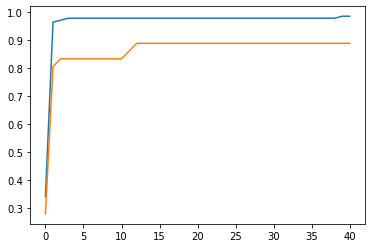

train accuracy: 0.9858156028368794
test accuracy: 0.8888888888888888


In [228]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn
LR = myLogisticRegression()
LR.fit(X_train, y_train)
print('train accuracy: {}'.format(accuracy(LR.predict(X_train), y_train)))
print('test accuracy: {}'.format(accuracy(LR.predict(X_test), y_test)))

In [229]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('train accuracy: {}'.format(LR.score(X_train, y_train)))
print('test accuracy: {}'.format(LR.score(X_test, y_test)))

train accuracy: 1.0
test accuracy: 0.9166666666666666


моя модель немного проигрывает в точности

(КП) добавление регуляризации не принесло результатов.  попробуем улучшить точность с помощью выравнивания количества образцов в каждом классе

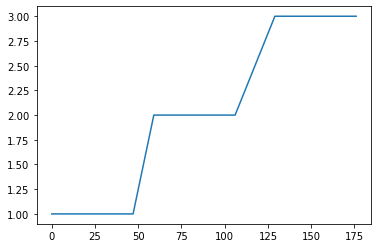

In [231]:
d1 = data.iloc[0:48]
d2 = data.iloc[59:59+48]
d3 = data.iloc[-48:]
data = d1.append(d2.append(d3))
y = data["1"]
X = data.drop(columns=["1"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
plt.plot(y)
plt.show()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

попробуем переобучить модель на этой выборке

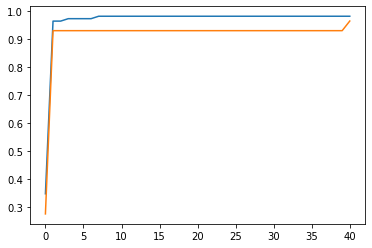

train accuracy: 0.9826086956521739
test accuracy: 0.9655172413793104


In [232]:
LR = myLogisticRegression()
LR.fit(X_train, y_train)
print('train accuracy: {}'.format(accuracy(LR.predict(X_train), y_train)))
print('test accuracy: {}'.format(accuracy(LR.predict(X_test), y_test)))

(КП) получили прирост на тестовой выборке